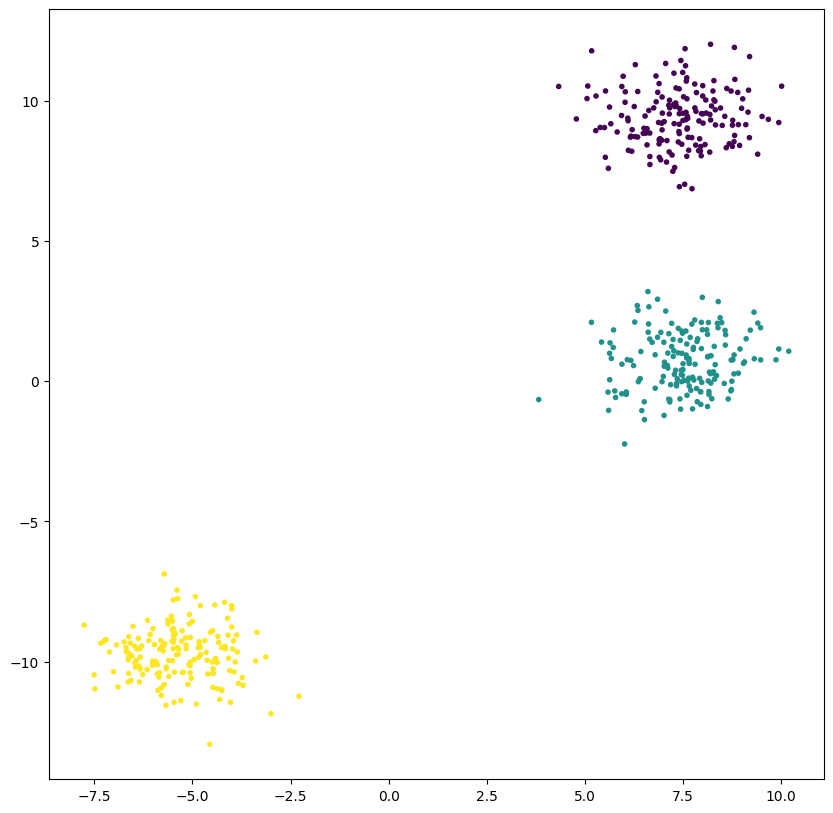

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

np.random.seed(0)

n_samples = 500

###########################################################
# X, labels_true = datasets.make_blobs(n_samples=n_samples, random_state=8)

###########################################################
# np.random.seed(0)
# t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
# x = t * np.cos(t)
# y = t * np.sin(t)
# X = np.concatenate((x, y))
# X += 0.7 * np.random.randn(2, n_samples)
# X = np.array(X.T)
# labels_true = np.ones(n_samples)

###########################################################
# X = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
# labels_true = np.ones(n_samples)

###########################################################
X = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
labels_true = np.ones(n_samples)


plt.scatter(X[:,0], X[:,1], c=labels_true, marker=".")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

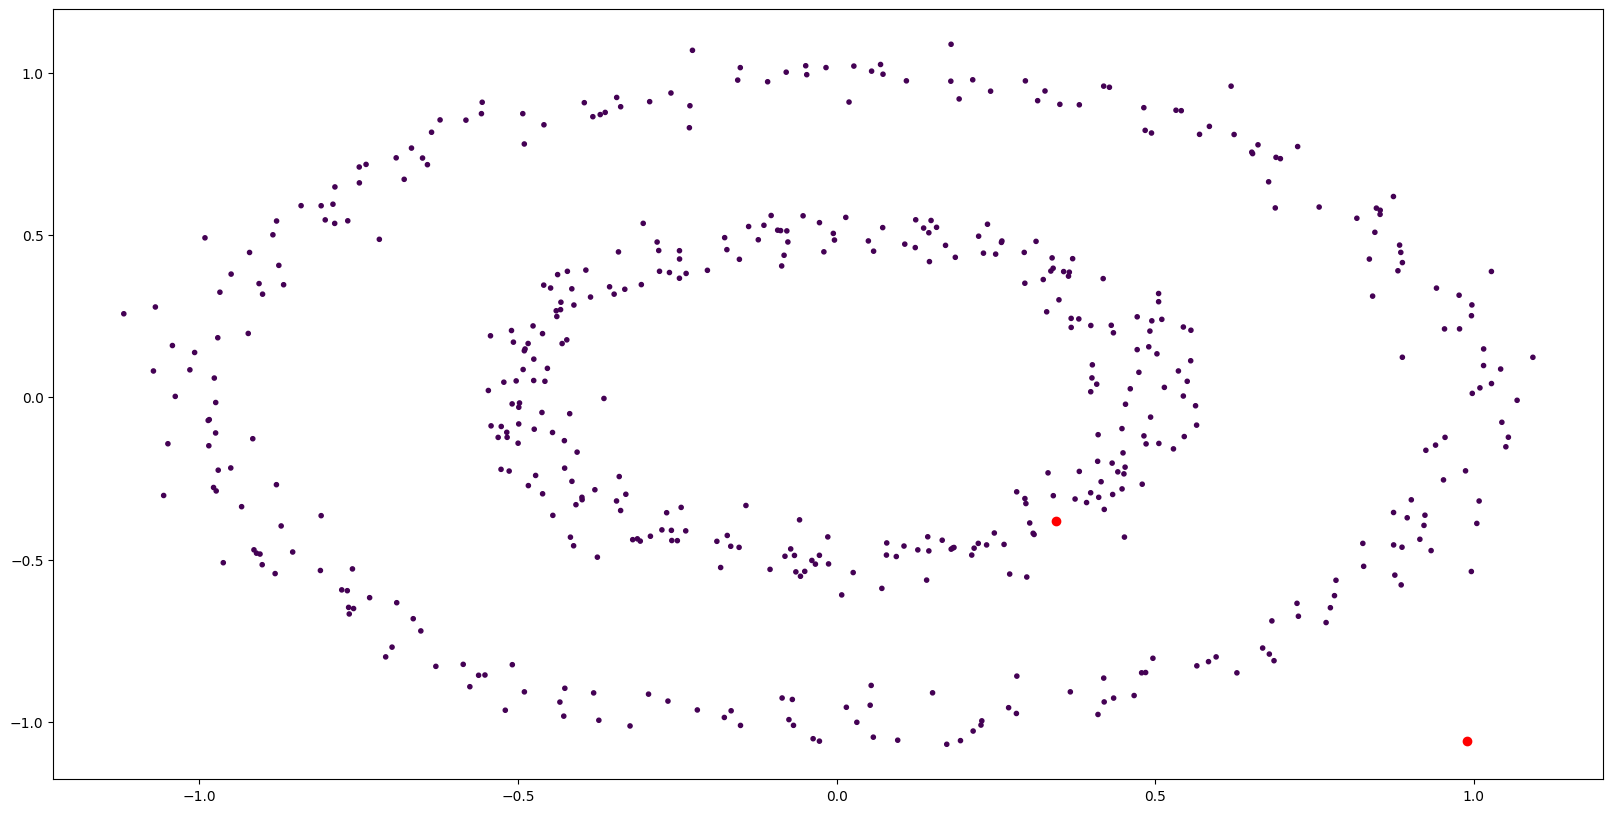

In [5]:
import random

# Function that gets the minimums and maximums from input features, and computes a random centroid.
def get_random_centroid(mm):
    n_f = mm.shape[1]
    centroids = np.ones((n_f))
    
    for i in np.arange(n_f):
        centroids[i] = random.uniform(mm[0,i], mm[1,i])
        
    return centroids
    
## Parameters
# number of clusters to be found
n_clusters = 2
# minimum error between previous and next centroid calculation
epsilon = 0.0001

# meta data from the dataset
n_features = X.shape[1]
min_max = np.ones((2,n_features))

# Find all mins and maxs for each feature so one can calculate random position of centroids
for i in np.arange(n_features):
    min_max[0,i] = min(X[:,i])
    min_max[1,i] = max(X[:,i])

# calculating the first centroids
centroids = np.ones((n_clusters,n_features))
for i in np.arange(n_clusters):
    centroids[i] = get_random_centroid(min_max)

plt.scatter(X[:,0], X[:,1], c=labels_true, marker=".")
plt.scatter(centroids[:,0], centroids[:,1], c="red")
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()


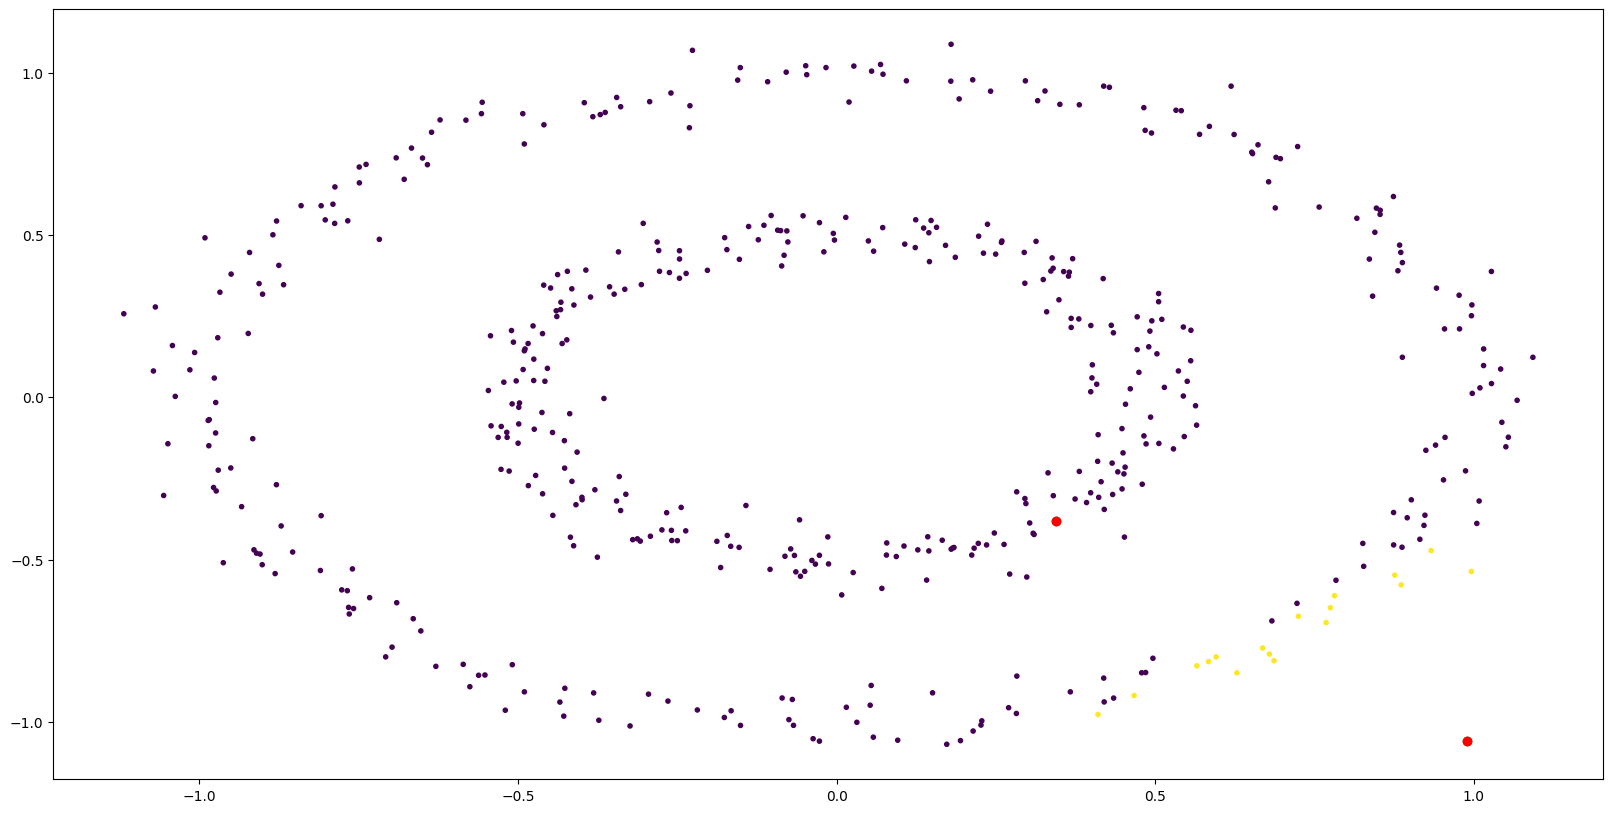

old_centroids: [[ 0.34429955 -0.38167377]
 [ 0.98951882 -1.05832499]]
centroids: [[-0.02504397  0.02242119]
 [ 0.70726873 -0.72522155]]
cluster distances: 0.9840593131904711


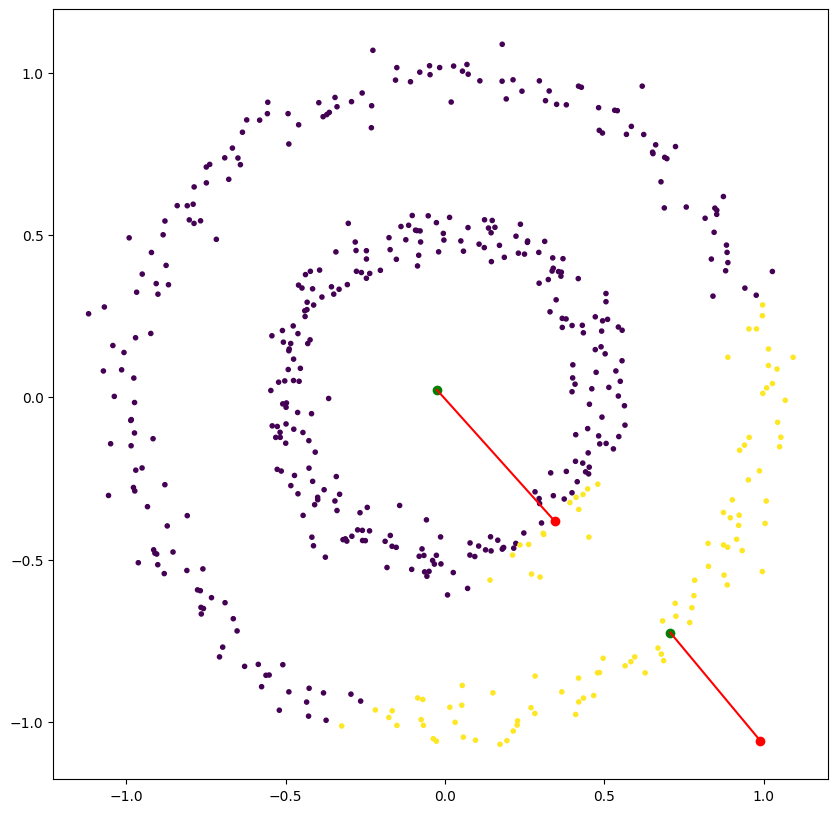

old_centroids: [[-0.02504397  0.02242119]
 [ 0.70726873 -0.72522155]]
centroids: [[-0.13844312  0.13831139]
 [ 0.54619938 -0.56124334]]
cluster distances: 0.391994156731899


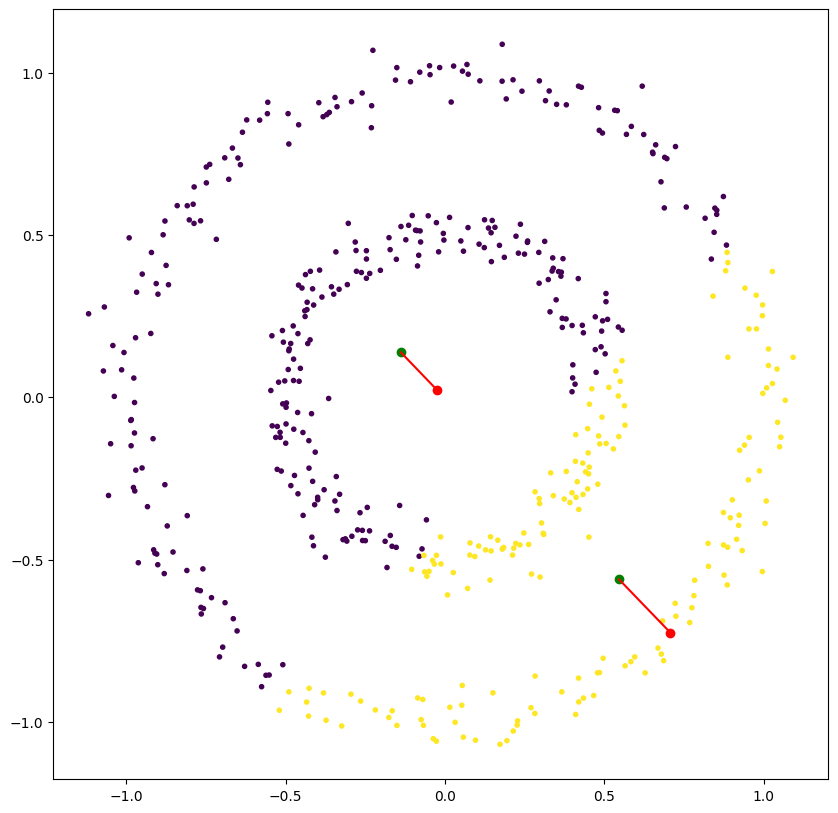

old_centroids: [[-0.13844312  0.13831139]
 [ 0.54619938 -0.56124334]]
centroids: [[-0.23086197  0.24546152]
 [ 0.42087993 -0.45640341]]
cluster distances: 0.30489076659135494


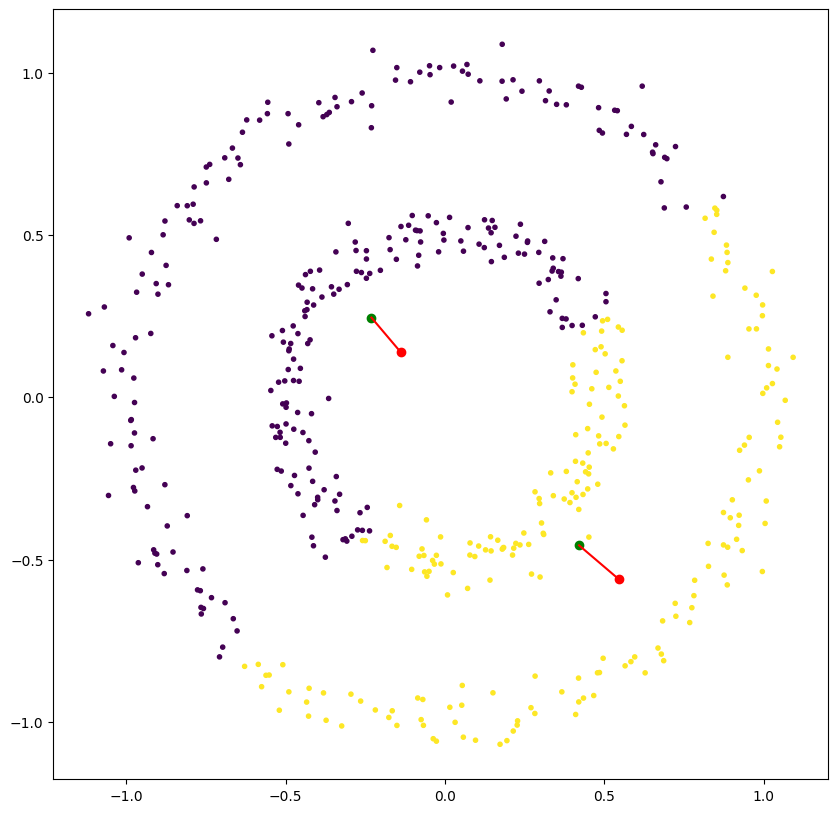

old_centroids: [[-0.23086197  0.24546152]
 [ 0.42087993 -0.45640341]]
centroids: [[-0.28752099  0.29306828]
 [ 0.38079449 -0.3954595 ]]
cluster distances: 0.14694958478385667


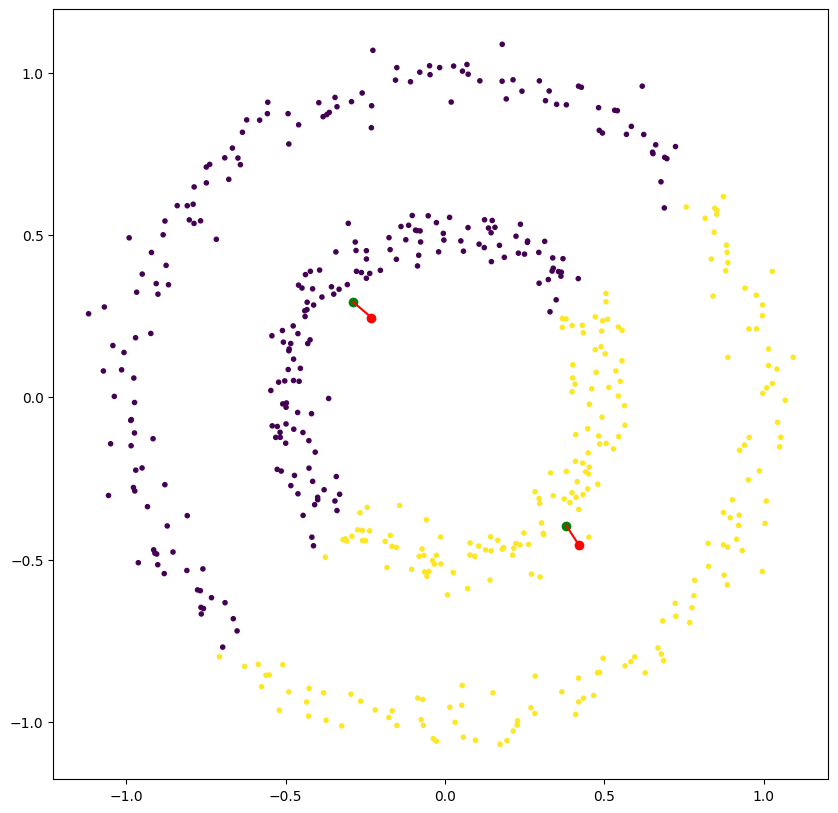

old_centroids: [[-0.28752099  0.29306828]
 [ 0.38079449 -0.3954595 ]]
centroids: [[-0.3159287   0.32303096]
 [ 0.35310385 -0.36770977]]
cluster distances: 0.08049102023095853


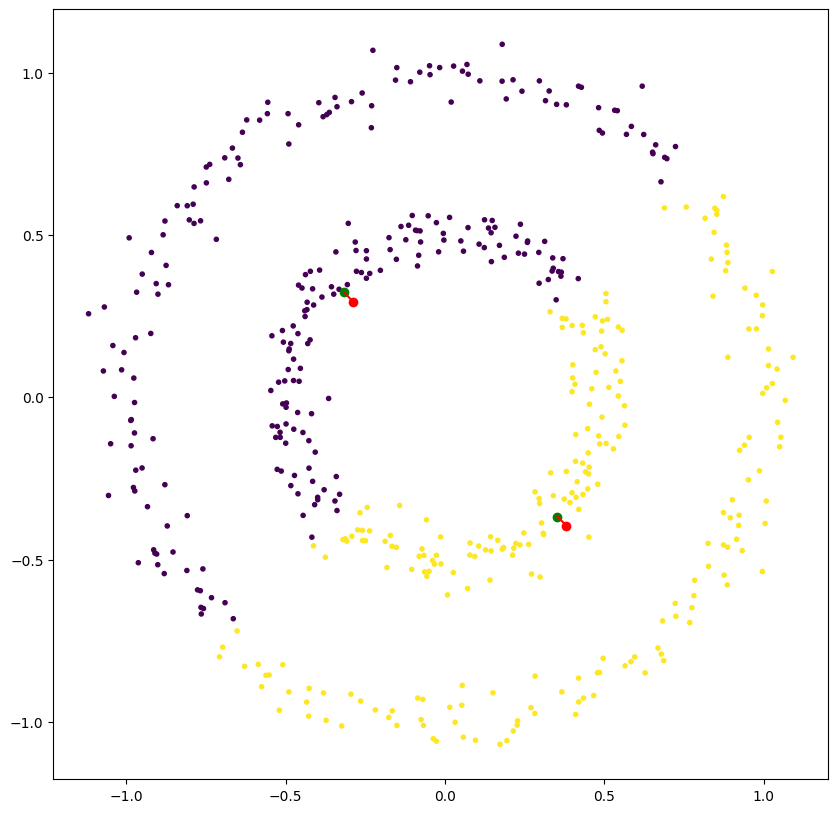

old_centroids: [[-0.3159287   0.32303096]
 [ 0.35310385 -0.36770977]]
centroids: [[-0.31915087  0.33351768]
 [ 0.34268633 -0.36464901]]
cluster distances: 0.021828432909417366


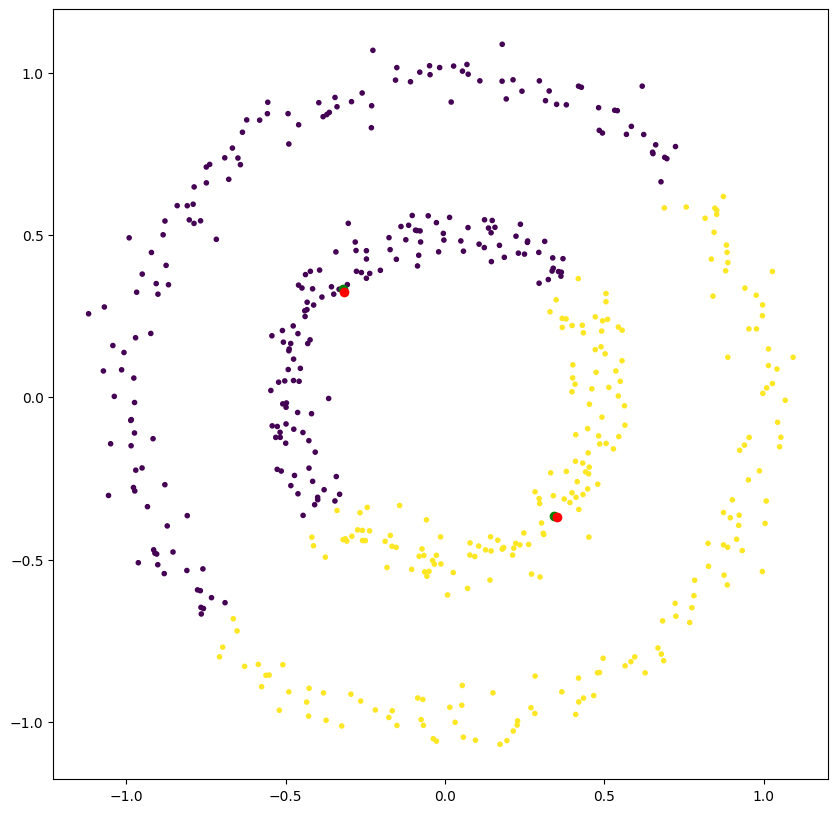

old_centroids: [[-0.31915087  0.33351768]
 [ 0.34268633 -0.36464901]]
centroids: [[-0.32285811  0.34321947]
 [ 0.33306216 -0.36047593]]
cluster distances: 0.020875931553149166


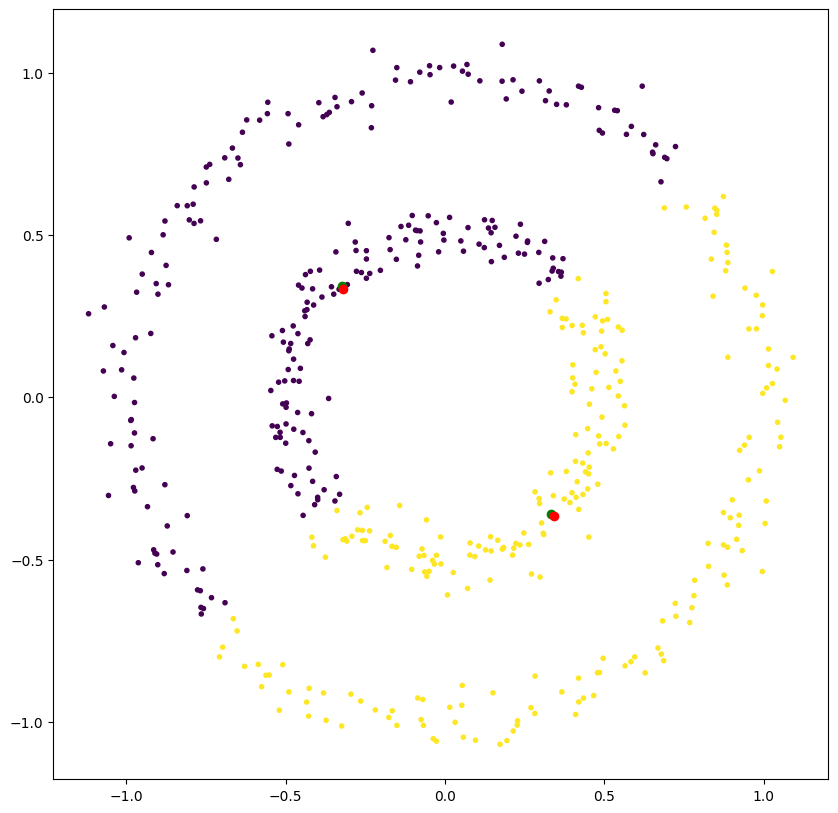

old_centroids: [[-0.32285811  0.34321947]
 [ 0.33306216 -0.36047593]]
centroids: [[-0.32285811  0.34321947]
 [ 0.33306216 -0.36047593]]
cluster distances: 0.0
Converged to a final solution


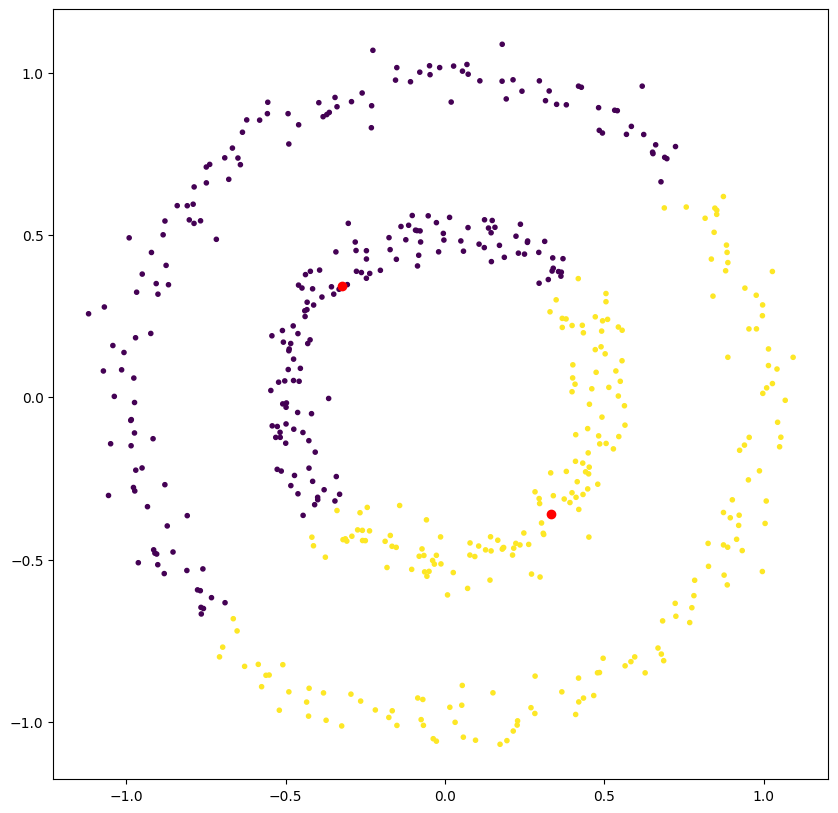

True labels


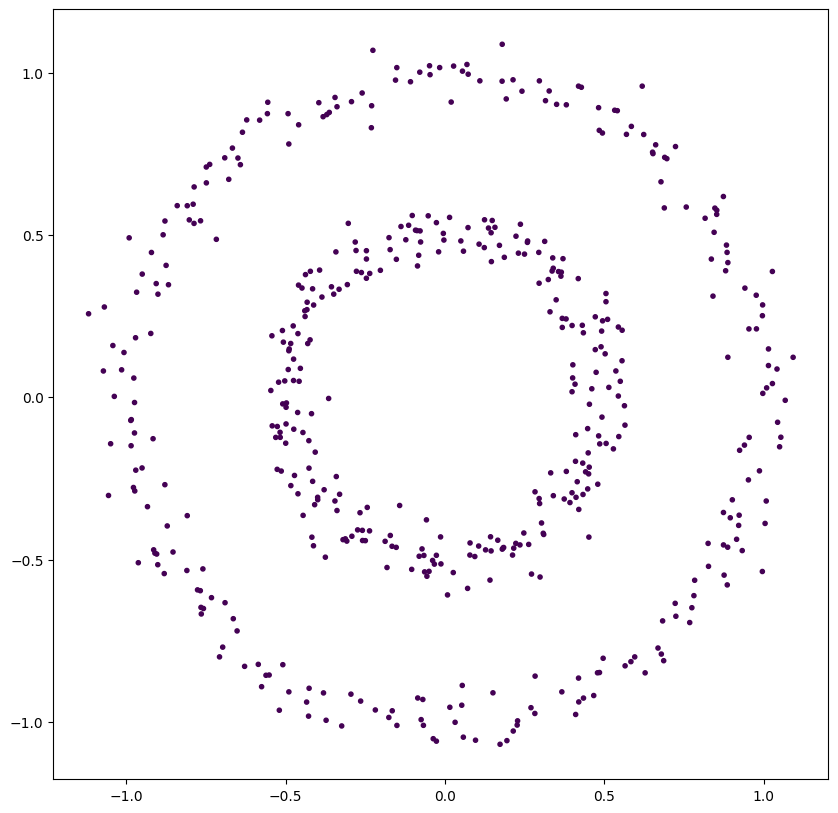

In [6]:
from scipy.spatial import distance

# buffer of centroids
old_centroids = centroids
cluster_dist = 9999

# until the distance between previous and new centroids is below epsilon
while cluster_dist > epsilon:
    
    # final cluster per sample
    clustering_vals = np.ones(X.shape[0])

    # for all points, calculate the distance towards each centroid
    for i in np.arange(X.shape[0]):
        temp_dst = 9999
        c_index = -1
        # for all clusters
        for c in np.arange(n_clusters):
            dst = distance.euclidean(centroids[c], X[i])
            if dst < temp_dst:
                temp_dst = dst
                c_index = c

        clustering_vals[i] = c_index

    ###################################################################################
    plt.scatter(X[:,0], X[:,1], c=clustering_vals, marker=".")
    plt.scatter(centroids[:,0], centroids[:,1], c="green")
    plt.scatter(old_centroids[:,0], old_centroids[:,1], c="red")
    for c in np.arange(n_clusters):
        plt.plot([old_centroids[c,0], centroids[c,0]],[old_centroids[c,1], centroids[c,1]],'r')
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.show()
    ###################################################################################
    
    old_centroids = centroids.copy()
    
    for c in np.arange(n_clusters):
        # filter samples per cluster
        filt_samples = X[np.where(clustering_vals == c),:][0]
        # calculate the mean value for all samples in a cluster
        result = np.sum(filt_samples, axis=0) / filt_samples.shape[0]
        # update cluster
        centroids[c] = result

    print("old_centroids:" , old_centroids)
    print("centroids:", centroids)
    
    # calculate distances between previous and next centroids
    cluster_dist = np.sum([distance.euclidean(centroids[c], old_centroids[c]) for c in np.arange(n_clusters)])
    print("cluster distances:" , cluster_dist)
    
###################################################################################
print("Converged to a final solution")
plt.scatter(X[:,0], X[:,1], c=clustering_vals, marker=".")
plt.scatter(centroids[:,0], centroids[:,1], c="red")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


print("True labels")
plt.scatter(X[:,0], X[:,1], c=labels_true, marker=".")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()